<a href="https://colab.research.google.com/github/Sajanm2058/Acoustic-Signal-Based-Binary-Classification-for-Brick-Wall-Inspection-by-Hammering-Test/blob/main/Signal_Analysis_for_brick_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import numpy as np
import soundfile as sf
import os
from scipy.signal import find_peaks

# Load audio file
audio_path = 'sample_106.wav'
y, sr = librosa.load(audio_path, sr=None)

# Calculate signal envelope (energy)
frame_length = 1024
hop_length = 512
energy = np.array([
    sum(abs(y[i:i+frame_length]**2))
    for i in range(0, len(y), hop_length)
])

# Find peaks in the energy signal
peaks, _ = find_peaks(energy, height=np.max(energy)*0.3, distance=10)  # tweak threshold if needed

# Convert peak indices to sample indices
hit_times = np.array(peaks) * hop_length

# Make output directory
output_dir = "hits_extracted"
os.makedirs(output_dir, exist_ok=True)

# Extract and save each hit (e.g. ±0.2 seconds around the peak)
window = int(0.1 * sr)  # 200ms
for i, t in enumerate(hit_times):
    start = max(0, (t - window))
    end = min(len(y), t + window)
    hit_audio = y[start:end]
    sf.write(f"{output_dir}/hit_{i+1}.wav", hit_audio, sr)

print(f"Extracted {len(hit_times)} hits and saved to '{output_dir}/'")


Extracted 6 hits and saved to 'hits_extracted/'


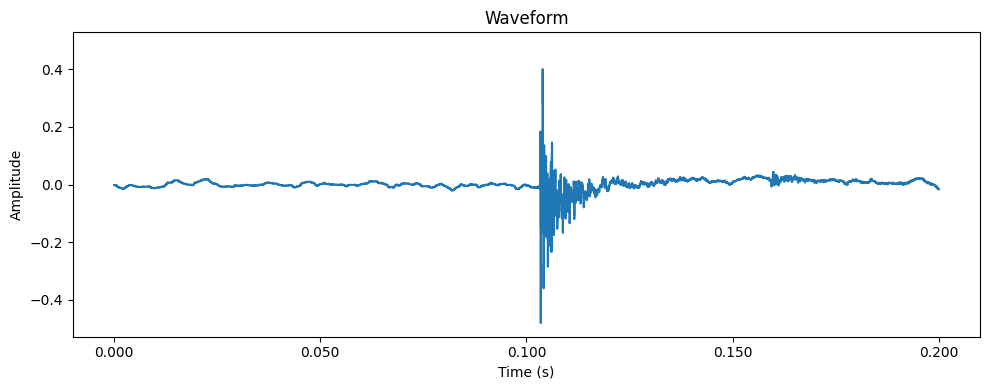

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("/content/hits_extracted/hit_1.wav")

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

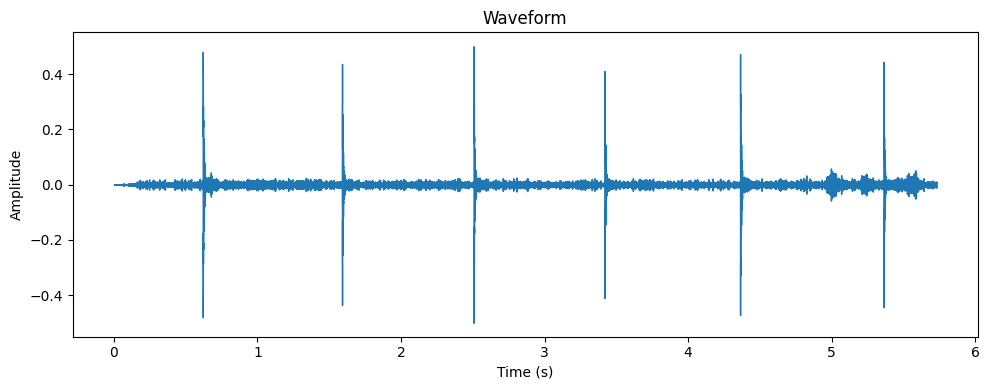

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("/content/sample_106.wav")

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

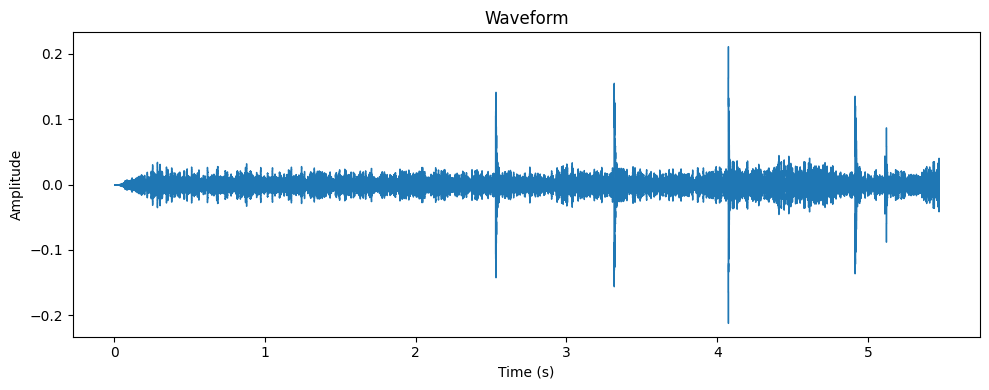

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("/content/sample_102.wav")

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [ ]:
import librosa
import numpy as np
import soundfile as sf
import os
from scipy.signal import find_peaks

# Load audio file
audio_path = 'sample_103.wav'
y, sr = librosa.load(audio_path, sr=None)

# Calculate signal envelope (energy)
frame_length = 1024
hop_length = 512
energy = np.array([
    sum(abs(y[i:i+frame_length]**2))
    for i in range(0, len(y), hop_length)
])

# Find peaks in the energy signal
peaks, _ = find_peaks(energy, height=np.max(energy)*0.3, distance=10)  # tweak threshold if needed

# Convert peak indices to sample indices
hit_times = np.array(peaks) * hop_length

# Make output directory
output_dir = "hits_extracted_bad"
os.makedirs(output_dir, exist_ok=True)

# Extract and save each hit (e.g. ±0.2 seconds around the peak)
window = int(0.1 * sr)  # 200ms
for i, t in enumerate(hit_times):
    start = max(0, (t - window))
    end = min(len(y), t + window)
    hit_audio = y[start:end]
    sf.write(f"{output_dir}/hit_{i+1}.wav", hit_audio, sr)

print(f"Extracted {len(hit_times)} hits and saved to '{output_dir}/'")

Extracted 5 hits and saved to 'hits_extracted_bad/'


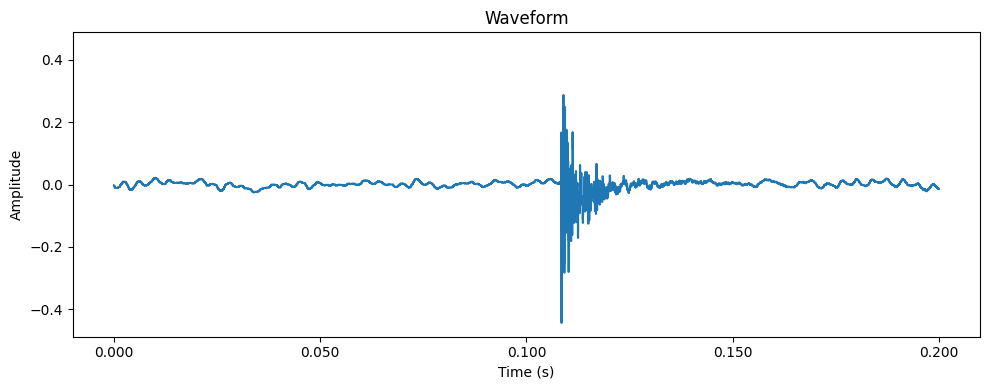

In [ ]:
y, sr = librosa.load("/content/hits_extracted_bad/hit_6.wav")

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [ ]:
import librosa
import numpy as np
import soundfile as sf
import os
from scipy.signal import find_peaks

# Load audio file
audio_path = 'sample_106.wav'
y, sr = librosa.load(audio_path, sr=None)

# Calculate signal envelope (energy)
frame_length = 1024
hop_length = 512
energy = np.array([
    sum(abs(y[i:i+frame_length]**2))
    for i in range(0, len(y), hop_length)
])

# Find peaks in the energy signal
peaks, _ = find_peaks(energy, height=np.max(energy) * 0.3, distance=10)

# Convert peak indices to sample indices
hit_times = np.array(peaks) * hop_length

# Output directories
hit_dir = "hits"
vibration_dir = "vibrations"
os.makedirs(hit_dir, exist_ok=True)
os.makedirs(vibration_dir, exist_ok=True)

# Parameters
hit_window = int(0.05 * sr)          # 50 ms before and after the peak for the hit
vibration_start_offset = int(0.1 * sr)   # Start 100 ms after the peak
vibration_duration = int(0.4 * sr)       # 400 ms duration for vibration

# Process and save hits and vibrations
for i, t in enumerate(hit_times):
    # Hit segment: 50ms before to 50ms after peak
    hit_start = max(0, t - hit_window)
    hit_end = min(len(y), t + hit_window)
    hit_audio = y[hit_start:hit_end]
    sf.write(f"{hit_dir}/hit_{i+1}.wav", hit_audio, sr)

    # Vibration segment: 100ms to 500ms after peak
    vib_start = t + vibration_start_offset
    vib_end = min(len(y), vib_start + vibration_duration)
    vibration_audio = y[vib_start:vib_end]
    sf.write(f"{vibration_dir}/vibration_{i+1}.wav", vibration_audio, sr)

print(f"Extracted {len(hit_times)} hits and vibrations.")


Extracted 6 hits and vibrations.


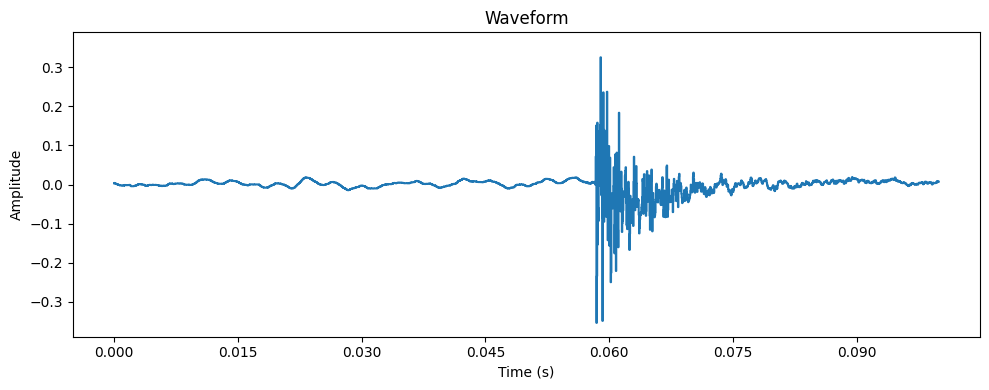

In [ ]:
y, sr = librosa.load("/content/hits/hit_6.wav")

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

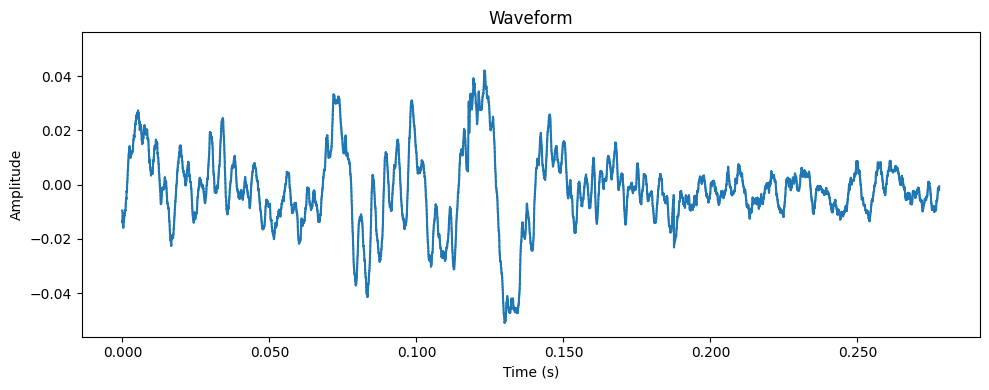

In [ ]:
y, sr = librosa.load("/content/vibrations/vibration_6.wav")

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import Audio

# Path to your WAV file
file_path = 'sample_106.wav'

# Play the file
Audio(file_path)


In [ ]:
from IPython.display import Audio

# Path to your WAV file
file_path = 'sample_103.wav'

# Play the file
Audio(file_path)


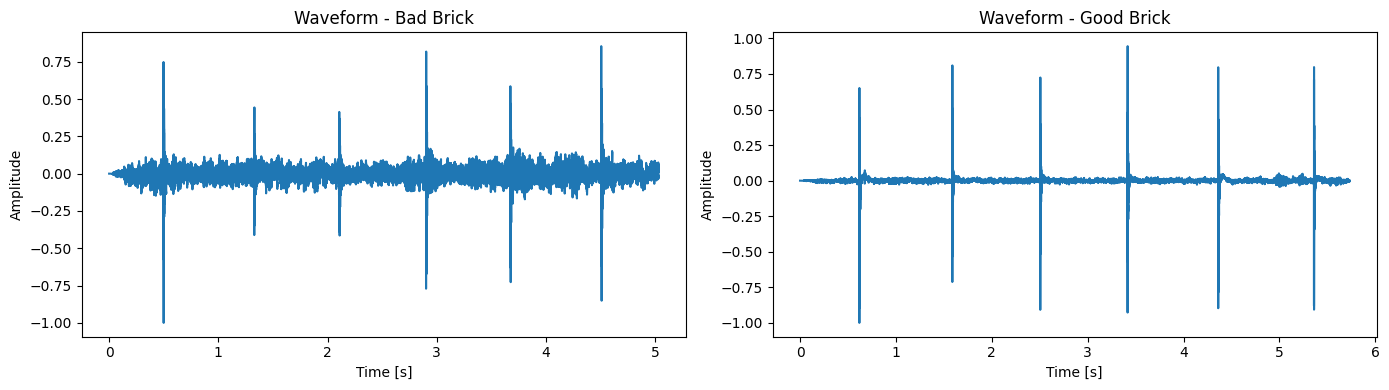

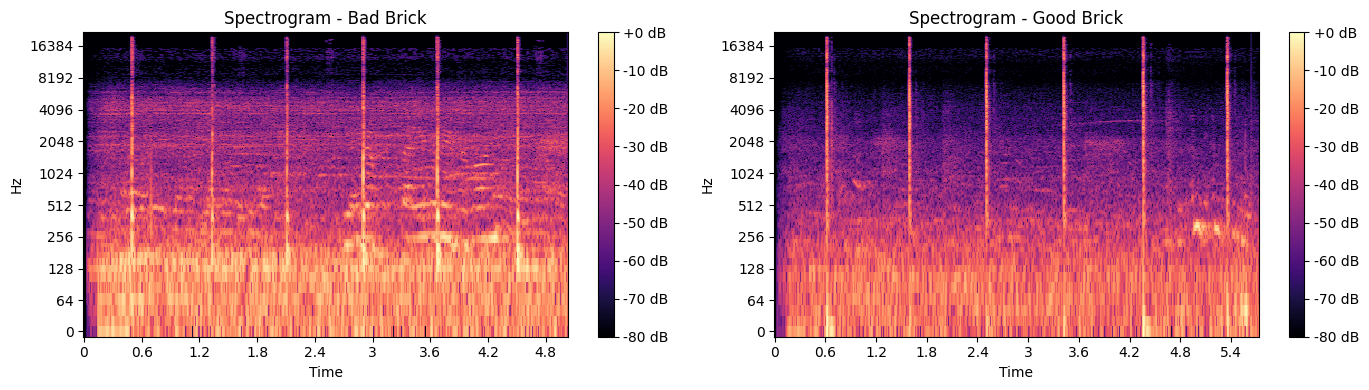

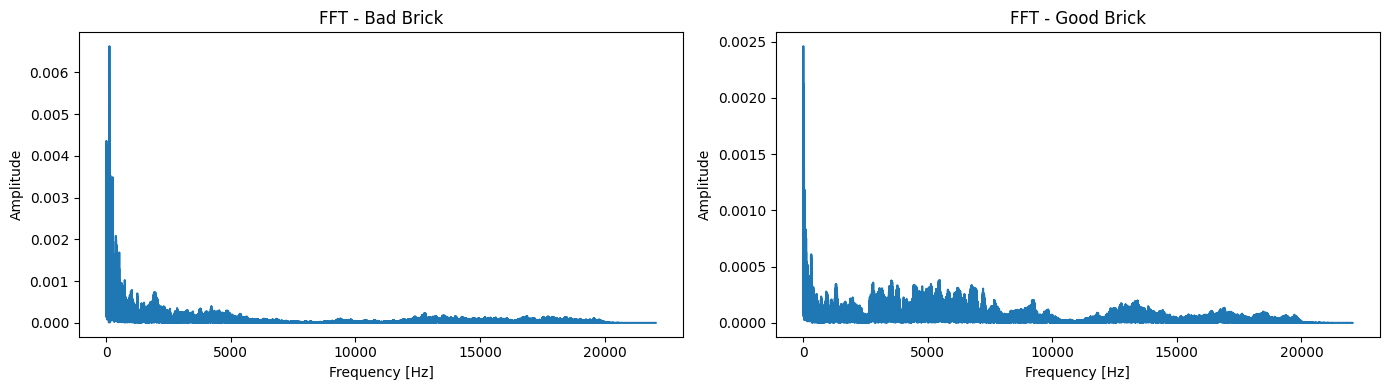

Bad Brick - Energy: 470.8272, RMS: 0.0461
Good Brick - Energy: 121.6288, RMS: 0.0219


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav
from scipy.fft import fft, fftfreq
import librosa
import librosa.display

# Load the audio files
fs1, data1 = wav.read('sample_103.wav')  # Bad brick
fs2, data2 = wav.read('sample_106.wav')  # Good brick

# Normalize audio (if stereo, take one channel)
if data1.ndim > 1:
    data1 = data1[:, 0]
if data2.ndim > 1:
    data2 = data2[:, 0]

data1 = data1 / np.max(np.abs(data1))
data2 = data2 / np.max(np.abs(data2))

# Time vectors
t1 = np.linspace(0, len(data1)/fs1, len(data1))
t2 = np.linspace(0, len(data2)/fs2, len(data2))

# Plot waveforms
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(t1, data1)
plt.title('Waveform - Bad Brick')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(t2, data2)
plt.title('Waveform - Good Brick')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Plot spectrograms using Librosa
y1, sr1 = librosa.load('sample_103.wav', sr=None)
y2, sr2 = librosa.load('sample_106.wav', sr=None)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max),
                         sr=sr1, y_axis='log', x_axis='time')
plt.title('Spectrogram - Bad Brick')
plt.colorbar(format='%+2.0f dB')

plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max),
                         sr=sr2, y_axis='log', x_axis='time')
plt.title('Spectrogram - Good Brick')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# FFT Analysis
def plot_fft(signal, fs, title):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plot_fft(data1, fs1, 'FFT - Bad Brick')

plt.subplot(1, 2, 2)
plot_fft(data2, fs2, 'FFT - Good Brick')
plt.tight_layout()
plt.show()

# Energy and RMS
energy1 = np.sum(data1**2)
energy2 = np.sum(data2**2)
rms1 = np.sqrt(np.mean(data1**2))
rms2 = np.sqrt(np.mean(data2**2))

print(f"Bad Brick - Energy: {energy1:.4f}, RMS: {rms1:.4f}")
print(f"Good Brick - Energy: {energy2:.4f}, RMS: {rms2:.4f}")


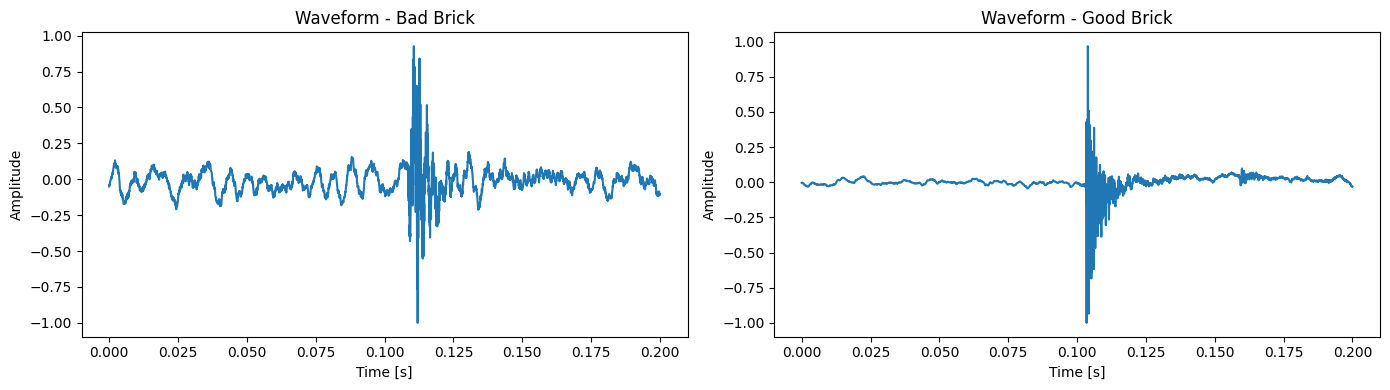

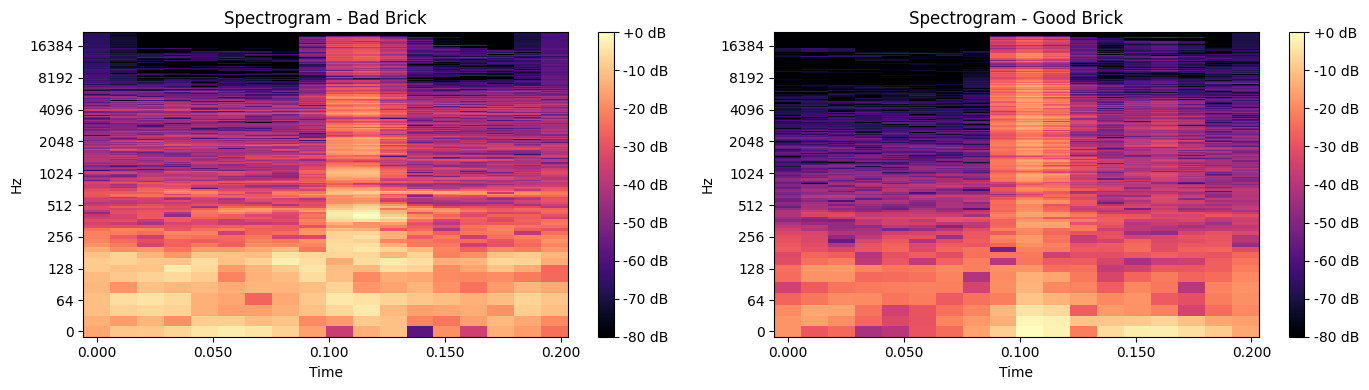

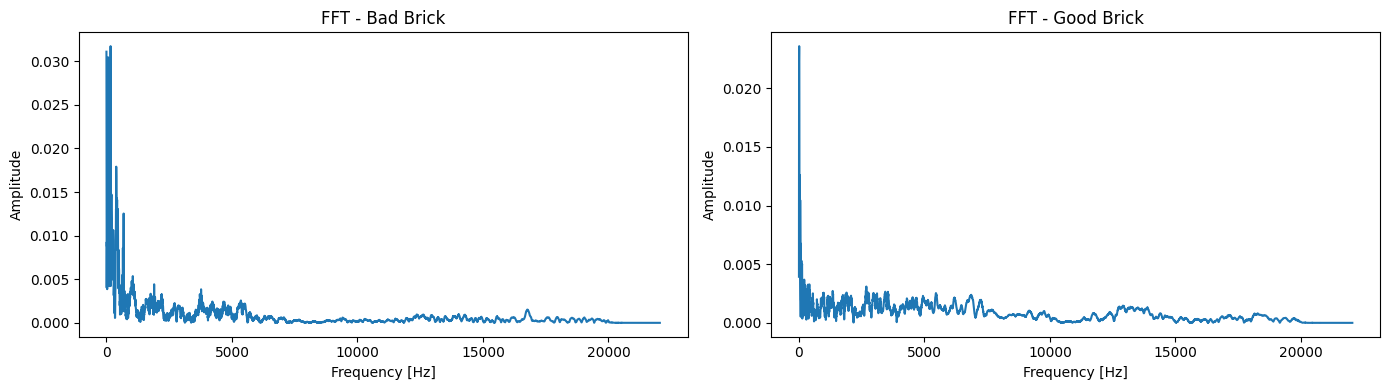

Bad Brick - Energy: 80.9768, RMS: 0.0958
Good Brick - Energy: 27.6959, RMS: 0.0560


In [ ]:

# Load the audio files
fs1, data1 = wav.read('/content/hits_extracted_bad/hit_1.wav')  # Bad brick
fs2, data2 = wav.read('/content/hits_extracted/hit_1.wav')  # Good brick

# Normalize audio (if stereo, take one channel)
if data1.ndim > 1:
    data1 = data1[:, 0]
if data2.ndim > 1:
    data2 = data2[:, 0]

data1 = data1 / np.max(np.abs(data1))
data2 = data2 / np.max(np.abs(data2))

# Time vectors
t1 = np.linspace(0, len(data1)/fs1, len(data1))
t2 = np.linspace(0, len(data2)/fs2, len(data2))

# Plot waveforms
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(t1, data1)
plt.title('Waveform - Bad Brick')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(t2, data2)
plt.title('Waveform - Good Brick')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Plot spectrograms using Librosa
y1, sr1 = librosa.load('/content/hits_extracted_bad/hit_1.wav', sr=None)
y2, sr2 = librosa.load('/content/hits_extracted/hit_1.wav', sr=None)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max),
                         sr=sr1, y_axis='log', x_axis='time')
plt.title('Spectrogram - Bad Brick')
plt.colorbar(format='%+2.0f dB')

plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max),
                         sr=sr2, y_axis='log', x_axis='time')
plt.title('Spectrogram - Good Brick')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# FFT Analysis
def plot_fft(signal, fs, title):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plot_fft(data1, fs1, 'FFT - Bad Brick')

plt.subplot(1, 2, 2)
plot_fft(data2, fs2, 'FFT - Good Brick')
plt.tight_layout()
plt.show()

# Energy and RMS
energy1 = np.sum(data1**2)
energy2 = np.sum(data2**2)
rms1 = np.sqrt(np.mean(data1**2))
rms2 = np.sqrt(np.mean(data2**2))

print(f"Bad Brick - Energy: {energy1:.4f}, RMS: {rms1:.4f}")
print(f"Good Brick - Energy: {energy2:.4f}, RMS: {rms2:.4f}")

In [ ]:
data1

array([-0.04969826, -0.04330848, -0.03851615, ..., -0.1086262 ,
       -0.10631878, -0.10489883])

In [ ]:
data2

array([-0.00455403, -0.00435886, -0.00390345, ..., -0.03474075,
       -0.033895  , -0.03291913])

### 🔹 **Your Output**:

| Metric     | Bad Brick | Good Brick |
| ---------- | --------: | ---------: |
| **Energy** |   80.9768 |    27.6959 |
| **RMS**    |    0.0958 |     0.0560 |

---

### 📘 Interpretation:

#### ✅ **1. Energy**

* **Energy** is the total “power” in the signal over time.
* **Bad Brick has \~3x more energy** than the Good Brick.

**What this means**:

* The **bad brick produced a more intense or longer-lasting sound** when hit.
* This could be due to:

  * Looser structure causing more internal vibrations.
  * Cracks or air gaps creating prolonged low-frequency ringing.

#### ✅ **2. RMS (Root Mean Square)**

* RMS gives the **average amplitude** of the waveform (kind of like average loudness).
* **Bad Brick RMS > Good Brick RMS**

**What this means**:

* The bad brick **sounded louder or more resonant**.
* Good bricks might produce **shorter, sharper, and cleaner sounds**, while bad bricks produce **longer, muddier, and more energy-filled impacts**.

---

### 🧠 Summary:

* Your results **quantitatively confirm** what you might expect: **bad bricks sound different from good bricks**, and this can be measured using audio features.
* These differences can be useful for:

  * **Automated quality inspection**.
  * Training a **machine learning model** to classify good vs. bad bricks based on sound.


